In [1]:
import numpy as np
import random
import time
import math
import random
import os
import json
import sys
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Notebook path
current_directory = os.getcwd()
# Get one behind for calling the other modules
root_directory = os.path.abspath(os.path.join(current_directory, '..'))
sys.path.append(root_directory)

#Network and measures
from to_get_data.net_construction_vis_measures import *

from to_get_data.generate_database import *
#Agrobiodiversity
from to_get_data.agrobiodiversity_data import *

from model_class.Variety import Variety
from model_class.UD import *
from model_class.UD_aleatory_inheritance import *

# General

## Endogamy

In [10]:
#ENDOGAMY 
#Parameters endogamy
experiments = 5
iniciais = 30 # Initial UD
prob_morte = 0.06 # Beta from the gutertz equation
mediao= 4# Average children per UD
#random.seed(42) # Random seed
t = 1200 #steps of the simulation
inheritance = [0,25,50,75,100, 'False']
view = 50
time_graf = list(range(view, t+1, view))
#inheritance = [15,20,30, 35]
data_inherit_endo = {}
data_step_mean_var_ud = {}
data_step_var_system = {}
data_step_unique_system = {}
for inherit in inheritance:
    data_step_mean_var_ud[inherit] = []
    data_step_var_system[inherit] = []
    data_step_unique_system[inherit] = []
    media = mediao
    print(f"Experiments with inheritance {inherit}")
    #Lists to store experiments' data
    data_endo_mean_ud = []
    data_endo_com_level = []
    data_endo_total_varieties = []
    original_media = media
    for exp in range(1, experiments+1):
        mean_var_ud = []
        var_system = []
        unique_system = []
        print(f'experimento {exp}')
        #### Initialization endogamy
        ## Communities
        communities = (list(range(1, 2 + 1)) * (iniciais // 2)) # Just 2 communities
        random.shuffle(communities)
        if inherit != 'False':
            UD_endogamy.uds = {}
            instancias_ud = []
            for id_ud in range(1, int(iniciais) + 1):
                    instancias_ud.append(UD_endogamy(id_ud, media, communities.pop()))
            ## Varieties
            limited_varieties = True
            if limited_varieties == False:
                for id_ud, ud in UD_endogamy.uds.items():
                    for _ in range(3):
                        ud.varieties.append(Variety())
            else:
                initial_varieties = [Variety() for _ in range (10)]
                for ud in UD_endogamy.uds.values():
                    random_samples = random.sample(initial_varieties, 3)
                    for sample in random_samples:
                        ud.varieties.append(sample)
            #### Simulation endogamy
            for i in range (1, (t+1)):
                uds_copy = {id_ud: ud for id_ud, ud in UD_endogamy.uds.items() if ud.activa}
                alive = len(uds_copy)
                if alive > 200 and (media == original_media): #or media == original_media-1):
                    media -= media//2
                    if media >= 4:
                        media = media //2
                    #print(media)
                elif alive < 150 and media < original_media:
                    media = original_media
                    #print(media)
                if not uds_copy:
                    print("acabo")
                    break
                # Cycle: 
                for id_ud, ud in uds_copy.items():
                    ud.ter_filho()
                    ud.buscar_ud(media, inherit, True)
                    ud.incrementar_idade()
                    ud.death_probability(prob_morte)
                if i%view == 0:
                    var_ud = []
                    var_total = []
                    for ud in [ud for ud in UD_endogamy.uds.values() if ud.activa ==True]:
                        var_ud.append(len(ud.varieties))
                        for variety in ud.varieties:
                            var_total.append(variety.variety_id)
                    mean_var_ud.append(np.mean(var_ud))
                    var_system.append(len(var_total))
                    unique_system.append(len(set(var_total))) 
            #print(len([ud for id, ud in uds_copy.items() if ud.activa]))
            #Get the distribution, community diversity and mean by UD
            total_varieties = []
            varieties_per_UD = []
            for ud in [ud for ud in UD_endogamy.uds.values() if ud.activa ==True]:
                varieties_per_UD.append(len(ud.varieties))
                for variety in ud.varieties:
                    total_varieties.append(variety.variety_id)
            #mean_ud = np.mean(varieties_per_UD)
            #diversity_comm_level = len(set(total_varieties))
            data_endo_mean_ud.append(np.mean(varieties_per_UD))
            data_endo_com_level.append(len(set(total_varieties)))
            data_endo_total_varieties.append(total_varieties)
        #data_inherit_endo[inherit] = [data_endo_mean_ud, data_endo_com_level, data_endo_total_varieties]
        else:
            UD_endogamy_al_inh.uds = {}
            instancias_ud = []
            for id_ud in range(1, int(iniciais) + 1):
                    instancias_ud.append(UD_endogamy_al_inh(id_ud, media, communities.pop()))
            ## Varieties
            limited_varieties = True
            if limited_varieties == False:
                for id_ud, ud in UD_endogamy_al_inh.uds.items():
                    for _ in range(3):
                        ud.varieties.append(Variety())
            else:
                initial_varieties = [Variety() for _ in range (10)]
                for ud in UD_endogamy_al_inh.uds.values():
                    random_samples = random.sample(initial_varieties, 3)
                    for sample in random_samples:
                        ud.varieties.append(sample)
            #### Simulation endogamy
            for i in range (1, (t+1)):
                uds_copy = {id_ud: ud for id_ud, ud in UD_endogamy_al_inh.uds.items() if ud.activa}
                alive = len(uds_copy)
                if alive > 200 and (media == original_media): #or media == original_media-1):
                    media -= media//2
                    if media >= 4:
                        media = media //2
                    #print(media)
                elif alive < 150 and media < original_media:
                    media = original_media
                    #print(media)
                if not uds_copy:
                    print("acabo")
                    break
                # Cycle: 
                varieties_list = [var for ud in uds_copy.values() for var in ud.varieties]
                for id_ud, ud in uds_copy.items():
                    ud.ter_filho()
                    ud.buscar_ud(media, varieties_list, True, 3)
                    ud.incrementar_idade()
                    ud.death_probability(prob_morte)
                if i%view == 0:
                    var_ud = []
                    var_total = []
                    for ud in [ud for ud in UD_endogamy_al_inh.uds.values() if ud.activa ==True]:
                        var_ud.append(len(ud.varieties))
                        for variety in ud.varieties:
                            var_total.append(variety.variety_id)
                    mean_var_ud.append(np.mean(var_ud))
                    var_system.append(len(var_total))
                    unique_system.append(len(set(var_total)))
            #print(len([ud for id, ud in uds_copy.items() if ud.activa]))
            #Get the distribution, community diversity and mean by UD
            total_varieties = []
            varieties_per_UD = []
            for ud in [ud for ud in UD_endogamy_al_inh.uds.values() if ud.activa ==True]:
                varieties_per_UD.append(len(ud.varieties))
                for variety in ud.varieties:
                    total_varieties.append(variety.variety_id)
            #mean_ud = np.mean(varieties_per_UD)
            #diversity_comm_level = len(set(total_varieties))
            data_endo_mean_ud.append(np.mean(varieties_per_UD))
            data_endo_com_level.append(len(set(total_varieties)))
            data_endo_total_varieties.append(total_varieties)
        alive = (len([ud for id, ud in uds_copy.items() if ud.activa]))
        if alive >= 80:
            print(f'esta si. {alive}')
            if len(mean_var_ud) == len(time_graf):        
                data_step_var_system[inherit].append(var_system)
                data_step_unique_system[inherit].append(unique_system)
                data_step_mean_var_ud[inherit].append(mean_var_ud)
#         data_step_var_system[inherit].append(var_system)
#         data_step_unique_system[inherit].append(unique_system)
#         data_step_mean_var_ud[inherit].append(mean_var_ud)
        data_inherit_endo[inherit] = [data_endo_mean_ud, data_endo_com_level, data_endo_total_varieties]
data_steps_inherit_endo = [data_step_var_system, data_step_unique_system, data_step_mean_var_ud]
# Folder
folder_name = 'results_inheritance_aleatory'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# Inherit data
inherit_endo_path = os.path.join(folder_name, 'inherit_data_endo.json')
# By steps
inherit_steps_endo_path = os.path.join(folder_name, 'inherit_steps_data_endo.json')
# Save
with open(inherit_endo_path, 'w') as json_file:
    json.dump(data_inherit_endo, json_file, indent=4)
# Save
with open(inherit_steps_endo_path, 'w') as json_file:
    json.dump(data_steps_inherit_endo, json_file, indent=4)
# Confirmation message
print("Data saved successfully to", inherit_endo_path)

Experiments with inheritance 0
experimento 1
esta si. 225
experimento 2
esta si. 114
experimento 3
experimento 4
esta si. 98
experimento 5
esta si. 88
experimento 6
experimento 7
esta si. 103
experimento 8
esta si. 111
experimento 9
esta si. 83
experimento 10
esta si. 86
experimento 11
esta si. 196
experimento 12
experimento 13
esta si. 113
experimento 14
esta si. 101
experimento 15
esta si. 154
experimento 16
esta si. 88
experimento 17
esta si. 202
experimento 18
esta si. 143
experimento 19
esta si. 142
experimento 20
esta si. 184
experimento 21
experimento 22
esta si. 120
experimento 23
esta si. 94
experimento 24
esta si. 131
experimento 25
esta si. 99
experimento 26
esta si. 127
experimento 27
experimento 28
esta si. 144
experimento 29
experimento 30
esta si. 96
experimento 31
esta si. 118
experimento 32
esta si. 86
experimento 33
esta si. 102
experimento 34
experimento 35
esta si. 124
experimento 36
esta si. 116
experimento 37
esta si. 90
experimento 38
esta si. 166
experimento 39


c:\users\jsolm\appdata\local\programs\python\python39\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\jsolm\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


esta si. 149
experimento 56
esta si. 154
experimento 57
esta si. 109
experimento 58
esta si. 159
experimento 59
experimento 60
esta si. 194
experimento 61
experimento 62
esta si. 99
experimento 63
esta si. 125
experimento 64
esta si. 131
experimento 65
esta si. 209
experimento 66
experimento 67
esta si. 166
experimento 68
esta si. 90
experimento 69
esta si. 163
experimento 70
esta si. 147
experimento 71
esta si. 114
experimento 72
esta si. 105
experimento 73
esta si. 112
experimento 74
esta si. 117
experimento 75
esta si. 188
experimento 76
experimento 77
esta si. 210
experimento 78
esta si. 153
experimento 79
esta si. 197
experimento 80
esta si. 166
experimento 81
esta si. 217
experimento 82
esta si. 141
experimento 83
esta si. 97
experimento 84
esta si. 126
experimento 85
esta si. 89
experimento 86
esta si. 177
experimento 87
esta si. 84
experimento 88
experimento 89
esta si. 183
experimento 90
esta si. 155
experimento 91
esta si. 90
experimento 92
esta si. 210
experimento 93
esta si

esta si. 168
experimento 5
esta si. 88
experimento 6
esta si. 202
experimento 7
esta si. 87
experimento 8
esta si. 94
experimento 9
esta si. 124
experimento 10
esta si. 141
experimento 11
esta si. 151
experimento 12
esta si. 118
experimento 13
esta si. 126
experimento 14
esta si. 178
experimento 15
esta si. 87
experimento 16
esta si. 157
experimento 17
experimento 18
esta si. 226
experimento 19
esta si. 83
experimento 20
esta si. 182
experimento 21
esta si. 201
experimento 22
esta si. 84
experimento 23
esta si. 95
experimento 24
esta si. 233
experimento 25
esta si. 128
experimento 26
esta si. 126
experimento 27
esta si. 113
experimento 28
esta si. 107
experimento 29
esta si. 116
experimento 30
esta si. 112
experimento 31
esta si. 221
experimento 32
esta si. 123
experimento 33
esta si. 133
experimento 34
esta si. 92
experimento 35
esta si. 182
experimento 36
esta si. 96
experimento 37
esta si. 105
experimento 38
esta si. 170
experimento 39
esta si. 175
experimento 40
esta si. 179
experi

esta si. 112
experimento 76
esta si. 195
experimento 77
esta si. 183
experimento 78
esta si. 95
experimento 79
esta si. 174
experimento 80
esta si. 136
experimento 81
esta si. 175
experimento 82
esta si. 162
experimento 83
esta si. 179
experimento 84
esta si. 88
experimento 85
esta si. 83
experimento 86
esta si. 95
experimento 87
experimento 88
esta si. 172
experimento 89
esta si. 83
experimento 90
esta si. 89
experimento 91
esta si. 149
experimento 92
esta si. 200
experimento 93
esta si. 150
experimento 94
experimento 95
esta si. 200
experimento 96
experimento 97
esta si. 191
experimento 98
esta si. 87
experimento 99
esta si. 212
experimento 100
esta si. 86
experimento 101
esta si. 108
experimento 102
esta si. 115
experimento 103
esta si. 90
experimento 104
esta si. 210
experimento 105
acabo
experimento 106
esta si. 124
experimento 107
esta si. 142
experimento 108
esta si. 107
experimento 109
esta si. 126
experimento 110
esta si. 191
experimento 111
esta si. 158
experimento 112
esta s

In [2]:
# Folder
folder_name = 'results_inheritance_aleatory'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# Inherit data
inherit_endo_path = os.path.join(folder_name, 'inherit_data_endo.json')
inherit_steps_endo_path = os.path.join(folder_name, 'inherit_steps_data_endo.json')
# Load
with open(inherit_endo_path, 'r') as json_file:
        loaded_data_inherit_endo = json.load(json_file)
with open(inherit_steps_endo_path, 'r') as json_file:
        loaded_data_inherit_steps_endo = json.load(json_file)
t = 1200 #steps of the simulation
#inheritance = [0,25,50,75,100, 'False']
view = 50
time_graf = list(range(view, t+1, view))

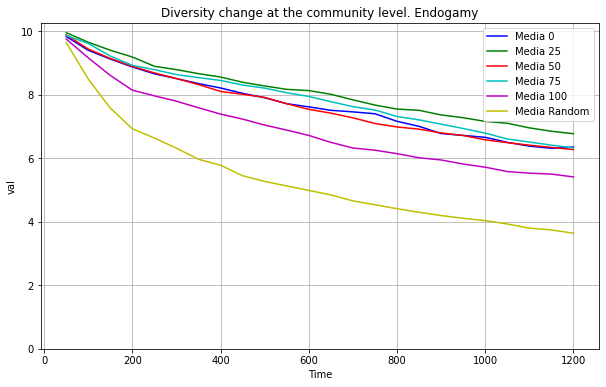

In [35]:
#By steps graphs
inheritance = ['0','25','50','75','100', 'False']

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

plt.figure(figsize=(10, 6))

for idx, inherit in enumerate(inheritance):
    #print(inherit)
    medias = np.mean(loaded_data_inherit_steps_endo[1][inherit], axis=0)
    desviaciones = np.std(loaded_data_inherit_steps_endo[1][inherit], axis=0)
    
    # Asigna un color diferente a cada línea
    color = colors[idx % len(colors)]
    
    if inherit == 'False':
        plt.plot(time_graf, medias, label=f'Media Random', color=color)
        #plt.fill_between(time_graf, medias - desviaciones, medias + desviaciones, color=color, alpha=0.2, label=f'Std {inherit}')
    else:
        plt.plot(time_graf, medias, label=f'Media {inherit}', color=color)
        #plt.fill_between(time_graf, medias - desviaciones, medias + desviaciones, color=color, alpha=0.2, label=f'Std {inherit}')

plt.xlabel('Time')
plt.ylabel('val')
plt.ylim(bottom=0)
plt.title('Diversity change at the community level. Endogamy')
plt.legend()
plt.grid(True)
plt.show()

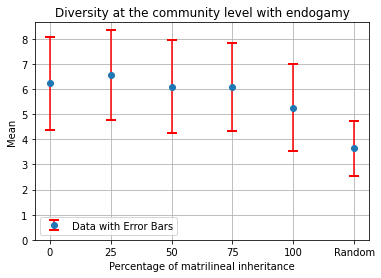

In [4]:
## Data and plot from loaded data
mean_div_com = []
std_div_com = []
inheritance = ['0','25','50','75','100', 'False']
#inheritance = ['15','20','30', '35']
#inheritance = [0,25,50,75,100, 'False']
for i in inheritance:
    mean_div_com.append(np.mean(loaded_data_inherit_endo[i][1]))
    std_div_com.append(np.std(loaded_data_inherit_endo[i][1]))
#Plot
inheritance_possibilities = ['0','25','50','75','100', 'Random']
#inheritance_possibilities = ['15','20','30', '35']
plt.errorbar(inheritance_possibilities, mean_div_com, yerr=std_div_com, fmt='o', capsize=5, capthick=2, ecolor='red', label='Data with Error Bars')
plt.xlabel('Percentage of matrilineal inheritance')
plt.ylim(0,10)
plt.ylabel('Mean')
plt.title('Diversity at the community level with endogamy')
plt.legend()
plt.grid(True)
plt.show()

## Dual organization

In [15]:
#DUAL ORGANIZATION
#Parameters dual_organization
experiments = 120
iniciais = 30 # Initial UD
prob_morte = 0.06 # Beta from the gutertz equation
mediao = 4 # Average children per UD
#random.seed(42) # Random seed
t = 1200 #steps of the simulation
view = 50
time_graf = list(range(view, t+1, view))
inheritance = [0,25,50,75,100, 'False']
data_inherit_dual = {}
data_step_mean_var_ud = {}
data_step_var_system = {}
data_step_unique_system = {}
for inherit in inheritance:
    data_step_mean_var_ud[inherit] = []
    data_step_var_system[inherit] = []
    data_step_unique_system[inherit] = []
    media = mediao
    print(f"Experiments with inheritance {inherit}")
    data_dual_mean_ud = []
    data_dual_com_level = []
    data_dual_total_varieties = []
    original_media = media
    for exp in range(1,experiments+1):
        mean_var_ud = []
        var_system = []
        unique_system = []
        print(f'experimento {exp}')
        #### Initialization dual_organization
        ## Communities and clans
        clans = (list(range(1, 2 + 1)) * (iniciais // 2)) # Just 2 clans
        communities = (list(range(1, 2 + 1)) * (iniciais // 2)) # Just 2 communities
        random.shuffle(clans)
        random.shuffle(communities)
        if inherit != 'False':
            UD_dual_organization.uds = {}
            instancias_ud = []
            for id_ud in range(1, int(iniciais) + 1):
                    instancias_ud.append(UD_dual_organization(id_ud, media, communities.pop(), clans.pop()))
            ## Varieties
            limited_varieties = True
            if limited_varieties == False:
                for id_ud, ud in UD_dual_organization.uds.items():
                    for _ in range(3):
                        ud.varieties.append(Variety())
            else:
                initial_varieties = [Variety() for _ in range (10)]
                for ud in UD_dual_organization.uds.values():
                    random_samples = random.sample(initial_varieties, 3)
                    for sample in random_samples:
                        ud.varieties.append(sample)
            #### Simulation
            for i in range (1, (t+1)):
                uds_copy = {id_ud: ud for id_ud, ud in UD_dual_organization.uds.items() if ud.activa}
                alive = len(uds_copy)
                if alive > 200 and (media == original_media): #or media == original_media-1):
                    media -= media//2
                    if media >= 4:
                        media = media //2
                    #print(f' no ano {i} temos a media {media}')
                elif alive < 150 and media < original_media:
                    media = original_media
                    #print(f' no ano {i} temos a media {media}')
                if not uds_copy:
                    print("acabo")
                    break
                # CYcle
                for id_ud, ud in uds_copy.items():
                    ud.ter_filho()
                    ud.buscar_ud(media, inherit, True, False)
                    ud.incrementar_idade()
                    ud.death_probability(prob_morte)
                if i%view == 0:
                    var_ud = []
                    var_total = []
                    for ud in [ud for ud in UD_dual_organization.uds.values() if ud.activa ==True]:
                        var_ud.append(len(ud.varieties))
                        for variety in ud.varieties:
                            var_total.append(variety.variety_id)
                    mean_var_ud.append(np.mean(var_ud))
                    var_system.append(len(var_total))
                    unique_system.append(len(set(var_total))) 
            #Get the distribution, community diversity and mean by UD
            total_varieties = []
            varieties_per_UD = []
            for ud in [ud for ud in UD_dual_organization.uds.values() if ud.activa ==True]:
                varieties_per_UD.append(len(ud.varieties))
                for variety in ud.varieties:
                    total_varieties.append(variety.variety_id)
            #mean_ud = np.mean(varieties_per_UD)
            #diversity_comm_level = len(set(total_varieties))
            data_dual_mean_ud.append(np.mean(varieties_per_UD))
            data_dual_com_level.append(len(set(total_varieties)))
            data_dual_total_varieties.append(total_varieties)
        #data_inherit_dual[inherit] = [data_dual_mean_ud, data_dual_com_level, data_dual_total_varieties]
        else:
            UD_dual_organization_al_inh.uds = {}
            instancias_ud = []
            for id_ud in range(1, int(iniciais) + 1):
                    instancias_ud.append(UD_dual_organization_al_inh(id_ud, media, communities.pop(), clans.pop()))
            ## Varieties
            limited_varieties = True
            if limited_varieties == False:
                for id_ud, ud in UD_dual_organization_al_inh.uds.items():
                    for _ in range(3):
                        ud.varieties.append(Variety())
            else:
                initial_varieties = [Variety() for _ in range (10)]
                for ud in UD_dual_organization_al_inh.uds.values():
                    random_samples = random.sample(initial_varieties, 3)
                    for sample in random_samples:
                        ud.varieties.append(sample)
            #### Simulation
            for i in range (1, (t+1)):
                uds_copy = {id_ud: ud for id_ud, ud in UD_dual_organization_al_inh.uds.items() if ud.activa}
                alive = len(uds_copy)
                if alive > 200 and (media == original_media): #or media == original_media-1):
                    media -= media//2
                    if media >= 4:
                        media = media //2
                    #print(media)
                elif alive < 150 and media < original_media:
                    media = original_media
                    #print(media)
                if not uds_copy:
                    print("acabo")
                    break
                # Cycle: 
                varieties_list = [var for ud in uds_copy.values() for var in ud.varieties]
                for id_ud, ud in uds_copy.items():
                    ud.ter_filho()
                    ud.buscar_ud(media, varieties_list, True, False)
                    ud.incrementar_idade()
                    ud.death_probability(prob_morte)
                if i%view == 0:
                    var_ud = []
                    var_total = []
                    for ud in [ud for ud in UD_dual_organization_al_inh.uds.values() if ud.activa ==True]:
                        var_ud.append(len(ud.varieties))
                        for variety in ud.varieties:
                            var_total.append(variety.variety_id)
                    mean_var_ud.append(np.mean(var_ud))
                    var_system.append(len(var_total))
                    unique_system.append(len(set(var_total))) 
            print(len([ud for id, ud in uds_copy.items() if ud.activa]))
            #Get the distribution, community diversity and mean by UD
            total_varieties = []
            varieties_per_UD = []
            for ud in [ud for ud in UD_dual_organization_al_inh.uds.values() if ud.activa ==True]:
                varieties_per_UD.append(len(ud.varieties))
                for variety in ud.varieties:
                    total_varieties.append(variety.variety_id)
            #mean_ud = np.mean(varieties_per_UD)
            #diversity_comm_level = len(set(total_varieties))
            data_dual_mean_ud.append(np.mean(varieties_per_UD))
            data_dual_com_level.append(len(set(total_varieties)))
            data_dual_total_varieties.append(total_varieties)
        alive = (len([ud for id, ud in uds_copy.items() if ud.activa]))
        if alive >= 80:
            print(f'esta si. {alive}')
            if len(mean_var_ud) == len(time_graf):        
                data_step_var_system[inherit].append(var_system)
                data_step_unique_system[inherit].append(unique_system)
                data_step_mean_var_ud[inherit].append(mean_var_ud)
#         data_step_var_system[inherit].append(var_system)
#         data_step_unique_system[inherit].append(unique_system)
#         data_step_mean_var_ud[inherit].append(mean_var_ud)
        data_inherit_dual[inherit] = [data_dual_mean_ud, data_dual_com_level, data_dual_total_varieties]
data_steps_inherit_dual = [data_step_var_system, data_step_unique_system, data_step_mean_var_ud]
# Folder
folder_name = 'results_inheritance_aleatory'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# Inherit data
inherit_dual_path = os.path.join(folder_name, 'inherit_data_dual.json')
# By steps
inherit_steps_dual_path = os.path.join(folder_name, 'inherit_steps_data_dual.json')
# Save
with open(inherit_dual_path, 'w') as json_file:
    json.dump(data_inherit_dual, json_file, indent=4)
with open(inherit_steps_dual_path, 'w') as json_file:
    json.dump(data_steps_inherit_dual, json_file, indent=4)
# Confirmation message
print("Data saved successfully to", inherit_dual_path)

Experiments with inheritance 0
experimento 1
esta si. 152
experimento 2
experimento 3
experimento 4
esta si. 179
experimento 5
esta si. 209
experimento 6
esta si. 122
experimento 7
esta si. 182
experimento 8
esta si. 139
experimento 9
esta si. 86
experimento 10
esta si. 103
experimento 11
esta si. 144
experimento 12
esta si. 187
experimento 13
esta si. 139
experimento 14
esta si. 224
experimento 15
esta si. 96
experimento 16
esta si. 148
experimento 17
esta si. 175
experimento 18
esta si. 97
experimento 19
esta si. 89
experimento 20
esta si. 85
experimento 21
esta si. 142
experimento 22
esta si. 117
experimento 23
esta si. 111
experimento 24
esta si. 173
experimento 25
esta si. 89
experimento 26
esta si. 170
experimento 27
esta si. 121
experimento 28
esta si. 88
experimento 29
esta si. 174
experimento 30
esta si. 149
experimento 31
esta si. 154
experimento 32
esta si. 158
experimento 33
esta si. 172
experimento 34
esta si. 80
experimento 35
esta si. 80
experimento 36
esta si. 95
experi

c:\users\jsolm\appdata\local\programs\python\python39\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\jsolm\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


esta si. 183
experimento 45
esta si. 96
experimento 46
esta si. 80
experimento 47
esta si. 237
experimento 48
esta si. 175
experimento 49
esta si. 80
experimento 50
experimento 51
esta si. 109
experimento 52
esta si. 88
experimento 53
esta si. 148
experimento 54
esta si. 125
experimento 55
esta si. 138
experimento 56
esta si. 119
experimento 57
esta si. 157
experimento 58
esta si. 136
experimento 59
esta si. 89
experimento 60
esta si. 150
experimento 61
esta si. 106
experimento 62
esta si. 175
experimento 63
esta si. 184
experimento 64
experimento 65
esta si. 126
experimento 66
esta si. 172
experimento 67
esta si. 183
experimento 68
experimento 69
esta si. 97
experimento 70
esta si. 124
experimento 71
esta si. 125
experimento 72
esta si. 119
experimento 73
esta si. 132
experimento 74
esta si. 122
experimento 75
esta si. 94
experimento 76
esta si. 124
experimento 77
esta si. 83
experimento 78
experimento 79
esta si. 112
experimento 80
experimento 81
esta si. 156
experimento 82
esta si. 

esta si. 133
experimento 116
esta si. 182
experimento 117
esta si. 167
experimento 118
esta si. 136
experimento 119
esta si. 90
experimento 120
esta si. 113
Experiments with inheritance 75
experimento 1
esta si. 214
experimento 2
esta si. 192
experimento 3
esta si. 114
experimento 4
esta si. 160
experimento 5
esta si. 94
experimento 6
experimento 7
esta si. 206
experimento 8
esta si. 91
experimento 9
esta si. 138
experimento 10
esta si. 124
experimento 11
esta si. 84
experimento 12
esta si. 95
experimento 13
esta si. 118
experimento 14
esta si. 157
experimento 15
esta si. 167
experimento 16
esta si. 205
experimento 17
acabo
experimento 18
experimento 19
esta si. 192
experimento 20
esta si. 230
experimento 21
esta si. 128
experimento 22
esta si. 91
experimento 23
esta si. 177
experimento 24
esta si. 115
experimento 25
experimento 26
esta si. 145
experimento 27
esta si. 229
experimento 28
experimento 29
esta si. 161
experimento 30
esta si. 177
experimento 31
esta si. 108
experimento 32
e

144
esta si. 144
experimento 60
119
esta si. 119
experimento 61
79
experimento 62
87
esta si. 87
experimento 63
96
esta si. 96
experimento 64
65
experimento 65
118
esta si. 118
experimento 66
139
esta si. 139
experimento 67
121
esta si. 121
experimento 68
138
esta si. 138
experimento 69
191
esta si. 191
experimento 70
183
esta si. 183
experimento 71
100
esta si. 100
experimento 72
103
esta si. 103
experimento 73
59
experimento 74
207
esta si. 207
experimento 75
135
esta si. 135
experimento 76
156
esta si. 156
experimento 77
49
experimento 78
153
esta si. 153
experimento 79
164
esta si. 164
experimento 80
98
esta si. 98
experimento 81
101
esta si. 101
experimento 82
110
esta si. 110
experimento 83
246
esta si. 246
experimento 84
138
esta si. 138
experimento 85
98
esta si. 98
experimento 86
236
esta si. 236
experimento 87
acabo
0
experimento 88
126
esta si. 126
experimento 89
166
esta si. 166
experimento 90
191
esta si. 191
experimento 91
256
esta si. 256
experimento 92
158
esta si. 158


In [3]:
# Folder
folder_name = 'results_inheritance_aleatory'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# Inherit data
inherit_dual_path = os.path.join(folder_name, 'inherit_data_dual.json')
inherit_steps_dual_path = os.path.join(folder_name, 'inherit_steps_data_dual.json')
# Load
with open(inherit_dual_path, 'r') as json_file:
        loaded_data_inherit_dual = json.load(json_file)
with open(inherit_steps_dual_path, 'r') as json_file:
        loaded_data_inherit_steps_dual = json.load(json_file)

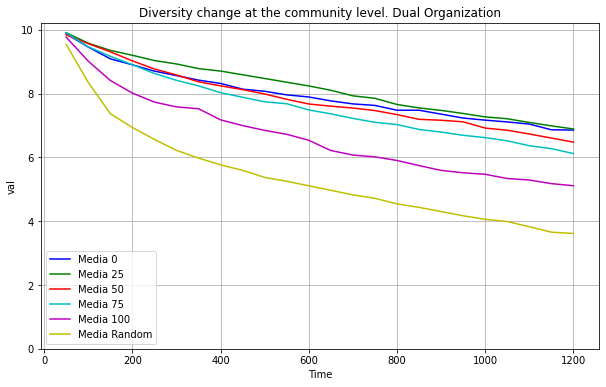

In [36]:
#By steps graphs
inheritance = ['0','25','50','75','100', 'False']

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

plt.figure(figsize=(10, 6))

for idx, inherit in enumerate(inheritance):
    #print(inherit)
    medias = np.mean(loaded_data_inherit_steps_dual[1][inherit], axis=0)
    desviaciones = np.std(loaded_data_inherit_steps_dual[1][inherit], axis=0)
    
    # Asigna un color diferente a cada línea
    color = colors[idx % len(colors)]
    
    if inherit == 'False':
        plt.plot(time_graf, medias, label=f'Media Random', color=color)
        #plt.fill_between(time_graf, medias - desviaciones, medias + desviaciones, color=color, alpha=0.2, label=f'Std {inherit}')
    else:
        plt.plot(time_graf, medias, label=f'Media {inherit}', color=color)
        #plt.fill_between(time_graf, medias - desviaciones, medias + desviaciones, color=color, alpha=0.2, label=f'Std {inherit}')

plt.xlabel('Time')
plt.ylabel('val')
plt.ylim(bottom=0)
plt.title('Diversity change at the community level. Dual Organization')
plt.legend()
plt.grid(True)
plt.show()

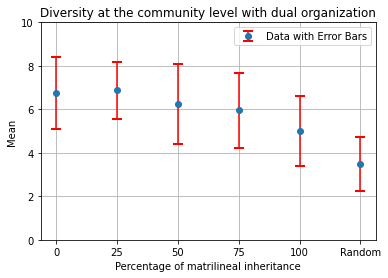

In [17]:
## Data and plot from loaded data
mean_div_com = []
std_div_com = []
inheritance = ['0','25','50','75','100', 'False']
#inheritance = [100,90,80,70,60,50, False]
for i in inheritance:
    mean_div_com.append(np.mean(loaded_data_inherit_dual[i][1]))
    std_div_com.append(np.std(loaded_data_inherit_dual[i][1]))
#Plot
inheritance_possibilities = ['0','25','50','75','100', 'Random']
plt.errorbar(inheritance_possibilities, mean_div_com, yerr=std_div_com, fmt='o', capsize=5, capthick=2, ecolor='red', label='Data with Error Bars')
plt.xlabel('Percentage of matrilineal inheritance')
plt.ylabel('Mean')
plt.ylim(0,10)
plt.title('Diversity at the community level with dual organization')
plt.legend()
plt.grid(True)
plt.show()

## Restricted

In [3]:
#UD_restricted
#Parameters restricted_exchange
experiments = 120
iniciais = 30 # Initial UD
prob_morte = 0.06 # Beta from the gutertz equation
mediao = 4 # Average children per UD
#random.seed(42) # Random seed
t = 1200 #steps of the simulation
inheritance = [0,25,50,75,100, 'False']
view = 50
time_graf = list(range(view, t+1, view))
data_inherit_restricted = {}
data_step_mean_var_ud = {}
data_step_var_system = {}
data_step_unique_system = {}
for inherit in inheritance:
    data_step_mean_var_ud[inherit] = []
    data_step_var_system[inherit] = []
    data_step_unique_system[inherit] = []
    media = mediao
    print(f"Experiments with inheritance {inherit}")
    data_restricted_mean_ud = []
    data_restricted_com_level = []
    data_restricted_total_varieties = []
    original_media = media
    for exp in range (1, experiments+1):
        mean_var_ud = []
        var_system = []
        unique_system = []
        print(f'experimento {exp}')
        #### Initialization restricted_exchange
        ## Communities
        clans = (list(range(1, 3 + 1)) * (iniciais // 3)) # Just 3 clans
        communities = (list(range(1, 2 + 1)) * (iniciais // 2)) # Just 2 communities
        random.shuffle(clans)
        random.shuffle(communities)
        if inherit != 'False':
            UD_restricted.uds = {}
            instancias_ud = []
            for id_ud in range(1, int(iniciais) + 1):
                    instancias_ud.append(UD_restricted(id_ud, media, communities.pop(), clans.pop()))
            ## Varieties
            limited_varieties = True
            if limited_varieties == False:
                for id_ud, ud in UD_restricted.uds.items():
                    for _ in range(3):
                        ud.varieties.append(Variety())
            else:
                initial_varieties = [Variety() for _ in range (10)]
                for ud in UD_restricted.uds.values():
                    random_samples = random.sample(initial_varieties, 3)
                    for sample in random_samples:
                        ud.varieties.append(sample)
            #### Simulation restricted
            for i in range (1, (t+1)):
                uds_copy = {id_ud: ud for id_ud, ud in UD_restricted.uds.items() if ud.activa}
                alive = len(uds_copy)
                if alive > 200 and (media == original_media): #or media == original_media-1):
                    media -= media//2
                    if media >= 4:
                        media = media //2
                    #print(media)
                elif alive < 150 and media < original_media:
                    media = original_media
                    #print(media)
                if not uds_copy:
                    print("acabo")
                    break
                # Cycle
                for id_ud, ud in uds_copy.items():
                    ud.ter_filho()
                    ud.buscar_ud(media, inherit, True, False)
                    ud.incrementar_idade()
                    ud.death_probability(prob_morte)
                if i%view == 0:
                    var_ud = []
                    var_total = []
                    for ud in [ud for ud in UD_restricted.uds.values() if ud.activa ==True]:
                        var_ud.append(len(ud.varieties))
                        for variety in ud.varieties:
                            var_total.append(variety.variety_id)
                    mean_var_ud.append(np.mean(var_ud))
                    var_system.append(len(var_total))
                    unique_system.append(len(set(var_total)))
            print(len([ud for id, ud in uds_copy.items() if ud.activa]))
            #Get the distribution, community diversity and mean by UD
            total_varieties = []
            varieties_per_UD = []
            for ud in [ud for ud in UD_restricted.uds.values() if ud.activa ==True]:
                varieties_per_UD.append(len(ud.varieties))
                for variety in ud.varieties:
                    total_varieties.append(variety.variety_id)
            #mean_ud = np.mean(varieties_per_UD)
            #diversity_comm_level = len(set(total_varieties))
            data_restricted_mean_ud.append(np.mean(varieties_per_UD))
            data_restricted_com_level.append(len(set(total_varieties)))
            data_restricted_total_varieties.append(total_varieties)
        #data_inherit_restricted[inherit] = [data_restricted_mean_ud, data_restricted_com_level, data_restricted_total_varieties]
        else:
            UD_restricted_al_inh.uds = {}
            instancias_ud = []
            for id_ud in range(1, int(iniciais) + 1):
                    instancias_ud.append(UD_restricted_al_inh(id_ud, media, communities.pop(), clans.pop()))
            ## Varieties
            limited_varieties = True
            if limited_varieties == False:
                for id_ud, ud in UD_restricted_al_inh.uds.items():
                    for _ in range(3):
                        ud.varieties.append(Variety())
            else:
                initial_varieties = [Variety() for _ in range (10)]
                for ud in UD_restricted_al_inh.uds.values():
                    random_samples = random.sample(initial_varieties, 3)
                    for sample in random_samples:
                        ud.varieties.append(sample)
            #### Simulation
            for i in range (1, (t+1)):
                uds_copy = {id_ud: ud for id_ud, ud in UD_restricted_al_inh.uds.items() if ud.activa}
                alive = len(uds_copy)
                if alive > 200 and (media == original_media): #or media == original_media-1):
                    media -= media//2
                    if media >= 4:
                        media = media //2
                    #print(media)
                elif alive < 150 and media < original_media:
                    media = original_media
                    #print(media)
                if not uds_copy:
                    print("acabo")
                    break
                # Cycle: 
                varieties_list = [var for ud in uds_copy.values() for var in ud.varieties]
                for id_ud, ud in uds_copy.items():
                    ud.ter_filho()
                    ud.buscar_ud(media, varieties_list, True, False)
                    ud.incrementar_idade()
                    ud.death_probability(prob_morte)
                if i%view == 0:
                    var_ud = []
                    var_total = []
                    for ud in [ud for ud in UD_restricted_al_inh.uds.values() if ud.activa ==True]:
                        var_ud.append(len(ud.varieties))
                        for variety in ud.varieties:
                            var_total.append(variety.variety_id)
                    mean_var_ud.append(np.mean(var_ud))
                    var_system.append(len(var_total))
                    unique_system.append(len(set(var_total)))
            print(len([ud for id, ud in uds_copy.items() if ud.activa]))
            #Get the distribution, community diversity and mean by UD
            total_varieties = []
            varieties_per_UD = []
            for ud in [ud for ud in UD_restricted_al_inh.uds.values() if ud.activa ==True]:
                varieties_per_UD.append(len(ud.varieties))
                for variety in ud.varieties:
                    total_varieties.append(variety.variety_id)
            #mean_ud = np.mean(varieties_per_UD)
            #diversity_comm_level = len(set(total_varieties))
            data_restricted_mean_ud.append(np.mean(varieties_per_UD))
            data_restricted_com_level.append(len(set(total_varieties)))
            data_restricted_total_varieties.append(total_varieties)
        alive = (len([ud for id, ud in uds_copy.items() if ud.activa]))
        if alive >= 80:
            print(f'esta si. {alive}')
            if len(mean_var_ud) == len(time_graf):        
                data_step_var_system[inherit].append(var_system)
                data_step_unique_system[inherit].append(unique_system)
                data_step_mean_var_ud[inherit].append(mean_var_ud)
        data_inherit_restricted[inherit] = [data_restricted_mean_ud, data_restricted_com_level, data_restricted_total_varieties]
data_steps_inherit_restricted = [data_step_var_system, data_step_unique_system, data_step_mean_var_ud] 
    
# Folder
folder_name = 'results_inheritance_aleatory'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# Inherit data
inherit_restricted_path = os.path.join(folder_name, 'inherit_data_restricted.json')
# By steps
inherit_steps_restricted_path = os.path.join(folder_name, 'inherit_steps_data_restricted.json')
# Save
with open(inherit_restricted_path, 'w') as json_file:
    json.dump(data_inherit_restricted, json_file, indent=4)
with open(inherit_steps_restricted_path, 'w') as json_file:
    json.dump(data_steps_inherit_restricted, json_file, indent=4)
# Confirmation message
print("Data saved successfully to", inherit_restricted_path)

Experiments with inheritance 0
experimento 1
172
esta si. 172
experimento 2
196
esta si. 196
experimento 3
acabo
0
experimento 4


c:\users\jsolm\appdata\local\programs\python\python39\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\jsolm\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


202
esta si. 202
experimento 5
acabo
0
experimento 6
98
esta si. 98
experimento 7
217
esta si. 217
experimento 8
139
esta si. 139
experimento 9
116
esta si. 116
experimento 10
102
esta si. 102
experimento 11
135
esta si. 135
experimento 12
87
esta si. 87
experimento 13
86
esta si. 86
experimento 14
182
esta si. 182
experimento 15
60
experimento 16
56
experimento 17
165
esta si. 165
experimento 18
159
esta si. 159
experimento 19
176
esta si. 176
experimento 20
99
esta si. 99
experimento 21
73
experimento 22
acabo
0
experimento 23
139
esta si. 139
experimento 24
163
esta si. 163
experimento 25
153
esta si. 153
experimento 26
57
experimento 27
132
esta si. 132
experimento 28
124
esta si. 124
experimento 29
85
esta si. 85
experimento 30
139
esta si. 139
experimento 31
92
esta si. 92
experimento 32
47
experimento 33
113
esta si. 113
experimento 34
178
esta si. 178
experimento 35
183
esta si. 183
experimento 36
221
esta si. 221
experimento 37
100
esta si. 100
experimento 38
100
esta si. 100


120
esta si. 120
experimento 32
90
esta si. 90
experimento 33
124
esta si. 124
experimento 34
123
esta si. 123
experimento 35
115
esta si. 115
experimento 36
80
esta si. 80
experimento 37
169
esta si. 169
experimento 38
212
esta si. 212
experimento 39
94
esta si. 94
experimento 40
72
experimento 41
137
esta si. 137
experimento 42
186
esta si. 186
experimento 43
121
esta si. 121
experimento 44
220
esta si. 220
experimento 45
183
esta si. 183
experimento 46
82
esta si. 82
experimento 47
97
esta si. 97
experimento 48
151
esta si. 151
experimento 49
192
esta si. 192
experimento 50
117
esta si. 117
experimento 51
118
esta si. 118
experimento 52
126
esta si. 126
experimento 53
106
esta si. 106
experimento 54
167
esta si. 167
experimento 55
89
esta si. 89
experimento 56
111
esta si. 111
experimento 57
94
esta si. 94
experimento 58
102
esta si. 102
experimento 59
129
esta si. 129
experimento 60
156
esta si. 156
experimento 61
184
esta si. 184
experimento 62
60
experimento 63
103
esta si. 103
e

152
esta si. 152
experimento 62
80
esta si. 80
experimento 63
98
esta si. 98
experimento 64
123
esta si. 123
experimento 65
149
esta si. 149
experimento 66
183
esta si. 183
experimento 67
125
esta si. 125
experimento 68
123
esta si. 123
experimento 69
98
esta si. 98
experimento 70
108
esta si. 108
experimento 71
150
esta si. 150
experimento 72
91
esta si. 91
experimento 73
63
experimento 74
147
esta si. 147
experimento 75
145
esta si. 145
experimento 76
135
esta si. 135
experimento 77
81
esta si. 81
experimento 78
75
experimento 79
140
esta si. 140
experimento 80
86
esta si. 86
experimento 81
164
esta si. 164
experimento 82
224
esta si. 224
experimento 83
acabo
0
experimento 84
95
esta si. 95
experimento 85
193
esta si. 193
experimento 86
35
experimento 87
272
esta si. 272
experimento 88
113
esta si. 113
experimento 89
84
esta si. 84
experimento 90
125
esta si. 125
experimento 91
164
esta si. 164
experimento 92
213
esta si. 213
experimento 93
207
esta si. 207
experimento 94
179
esta si

In [51]:
data_steps_inherit_restricted

[{0: [[84, 99, 153, 207, 318, 381, 615, 516, 255, 360, 528, 756]],
  25: [[102, 160, 192, 284, 436, 552, 644, 856, 532, 228, 348, 448],
   [168, 224, 240, 316, 352, 432, 556, 808, 572, 404, 624, 836]],
  50: [[243, 296, 508, 732, 900, 408, 544, 828, 560, 404, 540, 796],
   [184, 232, 296, 408, 488, 748, 828, 312, 340, 456, 620, 1000]],
  75: [[130, 196, 140, 232, 380, 452, 640, 852, 556, 420, 692, 1048],
   [100, 104, 88, 84, 132, 160, 132, 184, 308, 404, 496, 684]],
  100: [[129, 126, 168, 255, 312, 402, 669, 375, 264, 420, 549, 636],
   [63, 75, 93, 105, 156, 288, 330, 444, 438, 648, 429, 300]],
  'False': [[150, 174, 240, 300, 384, 543, 753, 390, 249, 249, 348, 423],
   [102, 81, 81, 45, 102, 141, 222, 189, 396, 489, 723, 342]]},
 {0: [[10, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]],
  25: [[10, 9, 8, 8, 7, 7, 7, 7, 7, 7, 7, 6],
   [10, 10, 10, 10, 10, 10, 9, 9, 9, 8, 8, 8]],
  50: [[10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
   [10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9]],
  75: [[10, 10, 9, 9, 9

In [4]:
# Folder
folder_name = 'results_inheritance_aleatory'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# Inherit data
inherit_restricted_path = os.path.join(folder_name, 'inherit_data_restricted.json')
inherit_steps_restricted_path = os.path.join(folder_name, 'inherit_steps_data_restricted.json')
# Load
with open(inherit_restricted_path, 'r') as json_file:
        loaded_data_inherit_restricted = json.load(json_file)
with open(inherit_steps_restricted_path, 'r') as json_file:
        loaded_data_inherit_steps_restricted = json.load(json_file)

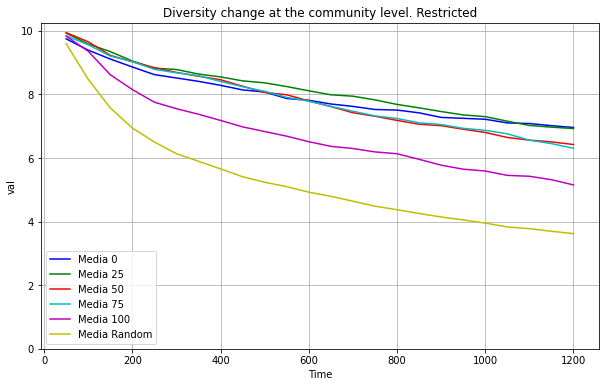

In [37]:
#By steps graphs
inheritance = ['0','25','50','75','100', 'False']

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

plt.figure(figsize=(10, 6))

for idx, inherit in enumerate(inheritance):
    #print(inherit)
    medias = np.mean(loaded_data_inherit_steps_restricted[1][inherit], axis=0)
    desviaciones = np.std(loaded_data_inherit_steps_restricted[1][inherit], axis=0)
    
    # Asigna un color diferente a cada línea
    color = colors[idx % len(colors)]
    
    if inherit == 'False':
        plt.plot(time_graf, medias, label=f'Media Random', color=color)
        #plt.fill_between(time_graf, medias - desviaciones, medias + desviaciones, color=color, alpha=0.2, label=f'Std {inherit}')
    else:
        plt.plot(time_graf, medias, label=f'Media {inherit}', color=color)
        #plt.fill_between(time_graf, medias - desviaciones, medias + desviaciones, color=color, alpha=0.2, label=f'Std {inherit}')


plt.xlabel('Time')
plt.ylabel('val')
plt.ylim(bottom=0)
plt.title('Diversity change at the community level. Restricted')
plt.legend()
plt.grid(True)
plt.show()

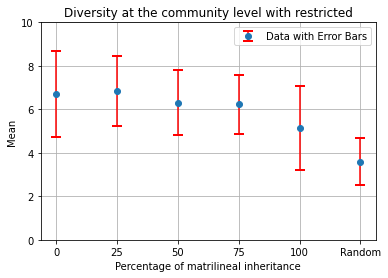

In [18]:
## Data and plot from loaded data
mean_div_com = []
std_div_com = []
inheritance = ['0','25','50','75','100', 'False']
#inheritance = [100,90,80,70,60,50, False]
for i in inheritance:
    mean_div_com.append(np.mean(loaded_data_inherit_restricted[i][1]))
    std_div_com.append(np.std(loaded_data_inherit_restricted[i][1]))
#Plot
inheritance_possibilities = ['0','25','50','75','100', 'Random']
plt.errorbar(inheritance_possibilities, mean_div_com, yerr=std_div_com, fmt='o', capsize=5, capthick=2, ecolor='red', label='Data with Error Bars')
plt.xlabel('Percentage of matrilineal inheritance')
plt.ylabel('Mean')
plt.ylim(0,10)
plt.title('Diversity at the community level with restricted')
plt.legend()
plt.grid(True)
plt.show()

# To visualize all of them at the same time

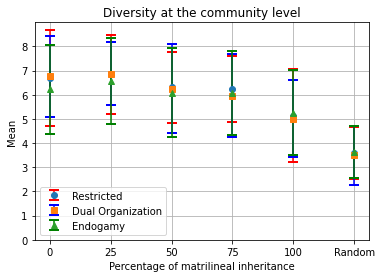

In [21]:
# Lists
mean_div_com_restricted = []
std_div_com_restricted = []
mean_div_com_dual = []
std_div_com_dual = []
mean_div_com_endo = []
std_div_com_endo = []
inheritance = ['0','25','50','75','100', 'False']
# Mean and std
for i in inheritance:
    mean_div_com_restricted.append(np.mean(loaded_data_inherit_restricted[i][1]))
    std_div_com_restricted.append(np.std(loaded_data_inherit_restricted[i][1]))
    mean_div_com_dual.append(np.mean(loaded_data_inherit_dual[i][1]))
    std_div_com_dual.append(np.std(loaded_data_inherit_dual[i][1]))
    mean_div_com_endo.append(np.mean(loaded_data_inherit_endo[i][1]))
    std_div_com_endo.append(np.std(loaded_data_inherit_endo[i][1]))

inheritance_possibilities = ['0','25','50','75','100', 'Random']
#Plot
plt.errorbar(inheritance_possibilities, mean_div_com_restricted, yerr=std_div_com_restricted, fmt='o', capsize=5, capthick=2, ecolor='red', label='Restricted')
plt.errorbar(inheritance_possibilities, mean_div_com_dual, yerr=std_div_com_dual, fmt='s', capsize=5, capthick=2, ecolor='blue', label='Dual Organization')
plt.errorbar(inheritance_possibilities, mean_div_com_endo, yerr=std_div_com_endo, fmt='^', capsize=5, capthick=2, ecolor='green', label='Generalized')
plt.xlabel('Percentage of matrilineal inheritance')
plt.ylabel('Varieties')
plt.ylim(bottom=0)
plt.title('Diversity at the community level')
plt.legend()
plt.grid(True)
plt.show()